In [1]:
import pickle 
import matplotlib.pyplot as plt

from plots.finance import *
from plots.finance.logy_graph import LogYGraph, SeabornFn
from plots.finance.distribution_report import *
from plots.finance.risk_return_report import Risk_Return_Ratio_Report, TwoVariablePortfolioReport
from plots.finance.percentile_comparision import *
from plots.finance.efficient_frontier import DrawEfficientFrontier

from scientific.finance import expected_shortfall
from scientific.finance.efficient_frontier import SimulateEfficientFrontier

### test plotly candle stick

In [2]:
with open('sp500.pickle', 'rb') as f:
    sp500 = pickle.load(f)
    
sp500.head(3)

,date,open,high,low,close,volume
0,2014-09-17,1999.300049,2010.739990,1993.290039,2001.569946,3209420000
1,2014-09-18,2003.069946,2012.339966,2003.069946,2011.359985,3235340000
2,2014-09-19,2012.739990,2019.260010,2006.589966,2010.400024,4880220000


In [3]:
draw_candle_plotly(sp500[:20], 'Giá SP500')

### test plotly line

In [4]:
draw_line_plotly(sp500[:20], 'date', 'close', 'Giá SP500')

c:\Users\LETPC\Nhan\projects\data science\data-framework\myvenv\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




### test LogY Graph

In [5]:
with open('sp500_btc.pickle', 'rb') as f:
    sp500_btc = pickle.load(f)
    
sp500_btc.head(3)

,date,open_sp500,high_sp500,low_sp500,close_sp500,volume_sp500,open_btc,high_btc,low_btc,close_btc,volume_btc
0,2014-09-17,1999.300049,2010.739990,1993.290039,2001.569946,3209420000,465.864014,468.174011,452.421997,457.334015,21056800.0
1,2014-09-18,2003.069946,2012.339966,2003.069946,2011.359985,3235340000,456.859985,456.859985,413.104004,424.440002,34483200.0
2,2014-09-19,2012.739990,2019.260010,2006.589966,2010.400024,4880220000,424.102997,427.834991,384.532013,394.795990,37919700.0


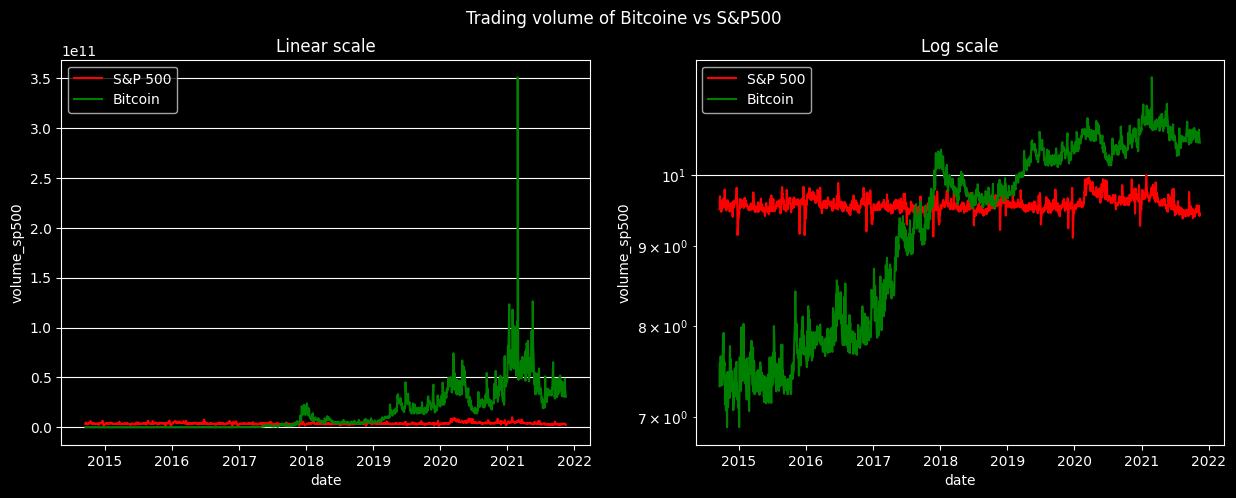

In [6]:
logy = LogYGraph((SeabornFn('lineplot', {'data': sp500_btc, 'x': sp500_btc.date, 'y': 'volume_sp500', 'color': 'red', 'label': 'S&P 500'}),
                SeabornFn('lineplot', {'data': sp500_btc, 'x': sp500_btc.date, 'y': 'volume_btc', 'color': 'green', 'label': 'Bitcoin'}),
                ))

fig, ax1, ax2 = logy.draw()
fig.suptitle('Trading volume of Bitcoine vs S&P500')
ax1.set_title('Linear scale')
ax2.set_title('Log scale')
ax1.grid(axis='y')
ax2.grid(axis='y')



### Dist_Moments_Report

In [7]:
with open('dcp_df.pickle', 'rb') as f:
    dcp_df = pickle.load(f)
    
dcp_df.head(3)

,sp500_dcp,btc_dcp,gold_dcp
0,0.000000,0.000000,0.000000
1,0.023201,-0.125659,-0.038537
2,0.024534,0.112692,0.020424


In [8]:
Dist_Moments_Report(dcp_df)(95)

,sp500_dcp,btc_dcp,gold_dcp
volatility ⬇,0.041,0.236,0.036
kurtosis ⬇,1.642,0.069,0.305
VaR (at 95) ⬆,-0.065,-0.282,-0.053
CVaR (at 95) ⬆,-0.087,-0.330,-0.066
MDD ⬆,-0.200,-0.764,-0.161


### Test CompareVarExtreme

In [9]:
CompareExtremeVaR(dcp_df, expected_shortfall)()

,sp500_dcp,btc_dcp,gold_dcp
CVaR at 80,-0.048,-0.204,-0.042
CVaR at 90,-0.071,-0.275,-0.055
CVaR at 95,-0.087,-0.330,-0.066
CVaR at 99,-0.125,-0.382,-0.073
PCT - 80,-0.000,-0.000,-0.000
PCT - 90,0.474,0.351,0.318
PCT - 95,0.234,0.200,0.194
PCT - 99,0.434,0.156,0.102


### Test Risk_Return_Ratio_Report

In [10]:
Risk_Return_Ratio_Report(dcp_df[['sp500_dcp', 'btc_dcp', 'gold_dcp']], dcp_df.sp500_dcp)()

,sp500_dcp,btc_dcp,gold_dcp
Sharpe Ratio,0.264,0.361,0.139
Sortino Ratio,0.338,0.842,0.250
Information Ratio,nan,0.328,-0.100
M2 Ratio,0.011,0.015,0.006


### Test draw ECDF & ECDF Boundaries

In [11]:
with open('inflation_month.pickle', 'rb') as f:
    inflation_month = pickle.load(f)
    
inflation_month.head(3)

,close_sp500,close_btc,gold_usd,cpi_us,inflation,sp_pct,btc_pct,gold_pct
date,,,,,,,,
2014-09-30,1972.290039,386.944000,1223.565,238.031,0.000000,0.000000,0.000000,0.000000
2014-10-31,2018.050049,338.321014,1176.413,237.433,-0.251228,2.320146,-12.565897,-3.853657
2014-11-30,2067.560059,376.446991,1200.440,236.151,-0.539942,2.453359,11.269172,2.042395


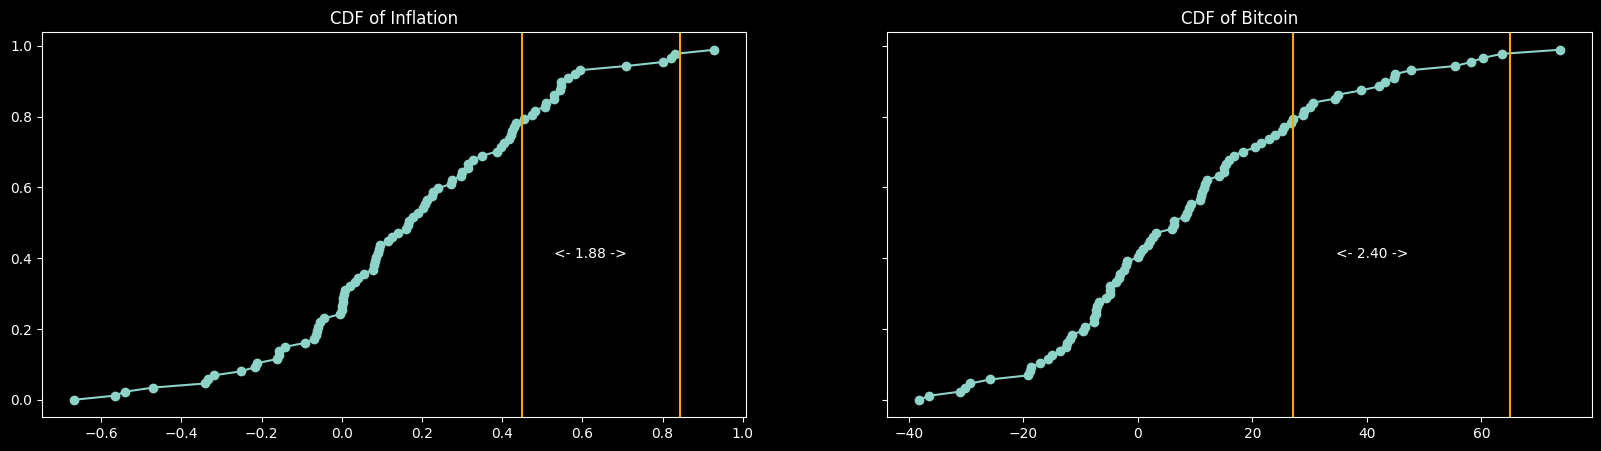

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5), sharey=True)

ax1 = draw_ecdf(ax1, inflation_month.inflation, 'Inflation')
ax2 = draw_ecdf(ax2, inflation_month.btc_pct, 'Bitcoin')
draw_percentile_boundaries(inflation_month.inflation, ax1, 80, 99)
draw_percentile_boundaries(inflation_month.btc_pct, ax2, 80, 99)

### Test percentile_comparision

In [13]:
with open('sample_percentile.pickle', 'rb') as f:
    sample_percentile = pickle.load(f)
    
for index, value in sample_percentile.items():
    print(index, value.head(3), sep='\n')

extreme
date
2015-03-31   -1.739611
2015-05-31    1.049138
2016-04-30    0.269940
Name: sp_pct, dtype: float64
middle
date
2014-09-30    0.000000
2015-02-28    5.489251
2015-04-30    0.852082
Name: sp_pct, dtype: float64
lowest
date
2014-10-31    2.320146
2014-11-30    2.453359
2014-12-31   -0.418859
Name: sp_pct, dtype: float64


Triangle is Mean, Line is Median 



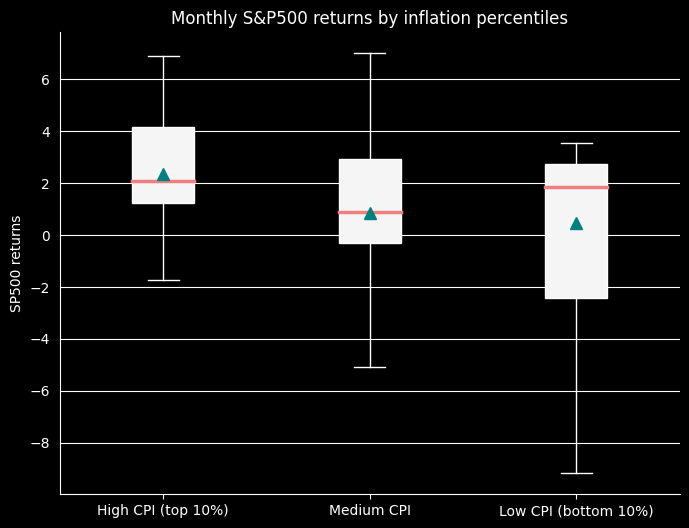

In [14]:
percentile_comparision_data = [sample_percentile['extreme'], sample_percentile['middle'], sample_percentile['lowest']]
fig, ax = draw_boxplot_percentile_comparision(percentile_comparision_data, ['High CPI (top 10%)','Medium CPI','Low CPI (bottom 10%)'])
plt.title('Monthly S&P500 returns by inflation percentiles')
ax.set_ylabel('SP500 returns')
print('Triangle is Mean, Line is Median \n')
plt.show()

### Test Two Var Portfolio

In [15]:
with open('portfolio_data.pickle', 'rb') as f:
    portfolio_data = pickle.load(f)
    
portfolio_data.head(3)

,close_btc,close_sp500,gold_usd
date,,,
2014-09-30,386.944000,1972.290039,1223.565
2014-10-31,338.321014,2018.050049,1176.413
2014-11-30,376.446991,2067.560059,1200.440


In [16]:
bitcoin_ratio = (.2, .4, .6, .8)
sp500_ratio = (.2, .4, .6, .8)

tt = TwoVariablePortfolioReport(portfolio_data) 
tt.add_steps(bitcoin_ratio, sp500_ratio)
tt.create_portfolio_stat()

In [17]:
display(tt.create_volatility_rp('Bitcoin', 'SP500'), 
      tt.create_ratio_rp(sortino_ratio, 'bitcoin', 'sp500', 'Sortino'),
      tt.create_var_rp(value_at_risk_single, 90, 'bitcoin', 'sp500', 'VaR'),
      )

,20% Bitcoin,40% Bitcoin,60% Bitcoin,80% Bitcoin
20% SP500,0.053881,0.097706,0.144056,0.191102
40% SP500,0.055376,0.100339,0.147077,nan
60% SP500,0.059181,0.104221,nan,nan
80% SP500,0.064891,nan,nan,nan


,20% bitcoin,40% bitcoin,60% bitcoin,80% bitcoin
20% sp500,1.096583,0.954729,0.900577,0.854240
40% sp500,1.024867,0.968305,0.859560,nan
60% sp500,0.877333,0.881725,nan,nan
80% sp500,0.730776,nan,nan,nan


,20% bitcoin,40% bitcoin,60% bitcoin,80% bitcoin
20% sp500,-0.043533,-0.067770,-0.102013,-0.139887
40% sp500,-0.043704,-0.066070,-0.102028,nan
60% sp500,-0.049801,-0.078533,nan,nan
80% sp500,-0.060850,nan,nan,nan


### Test Efficient Frontier

In [18]:
efficient = SimulateEfficientFrontier(portfolio_data, 100)()


DE = DrawEfficientFrontier(efficient, 'volatility', 'mean', 'sortino ratio', 'index_col')
DE('Annualised Risk (Volatility)', 'Annualised Return').show()